<a href="https://colab.research.google.com/github/emrehangorgec/GANsNFTs/blob/main/GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building GANs

## Week 1

### Introduction to PyTorch

#### Intro to PyTorch

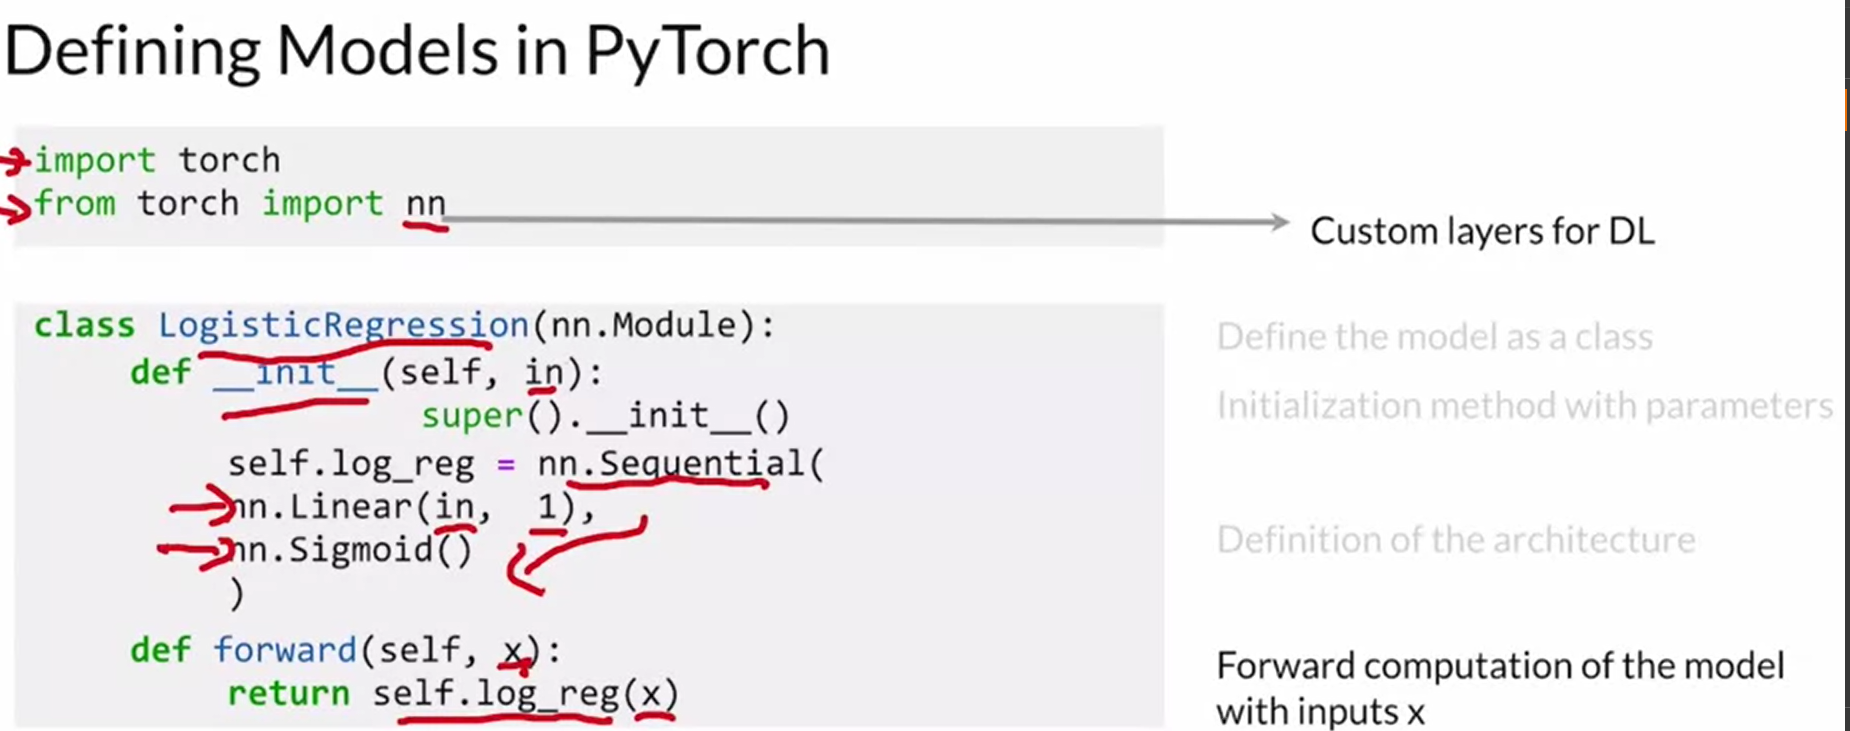

In [1]:
import torch

In [2]:
example_tensor = torch.Tensor(
    [
     [[1, 2], [3, 4]],
     [[5, 6], [7, 8]],
     [[9, 0], [1, 2]]
    ]
)

In [7]:
example_tensor

tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]],

        [[9., 0.],
         [1., 2.]]])

In [9]:
example_tensor.device

device(type='cpu')

In [10]:
example_tensor.shape

torch.Size([3, 2, 2])

In [12]:
example_tensor[1, 1, 0]

tensor(7.)

In [13]:
example_tensor[:, 0, 0]

tensor([1., 5., 9.])

In [14]:
torch.ones_like(example_tensor)

tensor([[[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]],

        [[1., 1.],
         [1., 1.]]])

In [15]:
torch.zeros_like(example_tensor)

tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]])

In [17]:
torch.randn_like(example_tensor)

tensor([[[-1.5416, -0.7699],
         [ 0.6007, -0.4206]],

        [[ 1.3254,  1.7843],
         [-1.6223, -1.7876]],

        [[-2.6869,  0.3199],
         [-1.0045,  1.5868]]])

In [16]:
torch.randn(2, 2, device='cpu') # Alternatively, for a GPU tensor, you'd use device='cuda'

tensor([[-2.2105,  2.2658],
        [-0.6318,  0.0311]])

In [18]:
(example_tensor - 5) * 2

tensor([[[ -8.,  -6.],
         [ -4.,  -2.]],

        [[  0.,   2.],
         [  4.,   6.]],

        [[  8., -10.],
         [ -8.,  -6.]]])

In [19]:
print("Mean:", example_tensor.mean())
print("Stdev:", example_tensor.std())

Mean: tensor(4.)
Stdev: tensor(2.9848)


In [20]:
example_tensor.mean(0)

# Equivalently, you could also write:
# example_tensor.mean(dim=0)
# example_tensor.mean(axis=0)
# torch.mean(example_tensor, 0)
# torch.mean(example_tensor, dim=0)
# torch.mean(example_tensor, axis=0)

tensor([[5.0000, 2.6667],
        [3.6667, 4.6667]])

#### Neural Network Module

In [21]:
import torch.nn as nn

In [22]:
linear = nn.Linear(10, 2)
example_input = torch.randn(3, 10)
example_output = linear(example_input)
example_output

tensor([[ 0.3112,  0.1774],
        [ 0.5955, -0.7431],
        [-0.4349, -1.3993]], grad_fn=<AddmmBackward0>)

In [23]:
relu = nn.ReLU()
relu_output = relu(example_output)
relu_output

tensor([[0.3112, 0.1774],
        [0.5955, 0.0000],
        [0.0000, 0.0000]], grad_fn=<ReluBackward0>)

In [24]:
batchnorm = nn.BatchNorm1d(2)
batchnorm_output = batchnorm(relu_output)
batchnorm_output

tensor([[ 0.0368,  1.4132],
        [ 1.2058, -0.7066],
        [-1.2426, -0.7066]], grad_fn=<NativeBatchNormBackward0>)

In [25]:
mlp_layer = nn.Sequential(
    nn.Linear(5, 2),
    nn.BatchNorm1d(2),
    nn.ReLU()
)

test_example = torch.randn(5,5) + 1
print("input: ")
print(test_example)
print("output: ")
print(mlp_layer(test_example))

input: 
tensor([[ 2.9062e-01,  5.0075e-01,  9.7499e-01, -1.0204e-01,  1.6053e+00],
        [ 7.2531e-01, -2.0987e-02, -4.2313e-02,  1.1919e+00,  1.6700e+00],
        [ 5.5687e-01,  1.4246e+00,  4.8313e-01,  4.1509e-04,  8.9315e-01],
        [ 2.2694e+00,  1.3756e+00, -4.9393e-02,  2.6987e-01,  4.7978e-01],
        [ 4.6107e-01,  1.1326e+00,  6.6704e-01,  5.2345e-01, -5.8601e-01]])
output: 
tensor([[0.0000, 0.0000],
        [1.6279, 0.0000],
        [0.0000, 0.3068],
        [0.5649, 1.6942],
        [0.0000, 0.0000]], grad_fn=<ReluBackward0>)


In [26]:
import torch.optim as optim
adam_opt = optim.Adam(mlp_layer.parameters(), lr=1e-1)

In [27]:
train_example = torch.randn(100,5) + 1
adam_opt.zero_grad()

# We'll use a simple loss function of mean distance from 1
# torch.abs takes the absolute value of a tensor
cur_loss = torch.abs(1 - mlp_layer(train_example)).mean()

cur_loss.backward()
adam_opt.step()
print(cur_loss)

tensor(0.7894, grad_fn=<MeanBackward0>)


In [28]:
class ExampleModule(nn.Module):
    def __init__(self, input_dims, output_dims):
        super(ExampleModule, self).__init__()
        self.linear = nn.Linear(input_dims, output_dims)
        self.exponent = nn.Parameter(torch.tensor(1.))

    def forward(self, x):
        x = self.linear(x)

        # This is the notation for element-wise exponentiation,
        # which matches python in general
        x = x ** self.exponent

        return x

In [29]:
example_model = ExampleModule(10, 2)
list(example_model.parameters())

[Parameter containing:
 tensor(1., requires_grad=True),
 Parameter containing:
 tensor([[ 0.2256, -0.1415,  0.3093,  0.1356,  0.1965,  0.0602, -0.2143,  0.0097,
          -0.0408, -0.3136],
         [-0.2387,  0.0719,  0.0966, -0.1482, -0.0991,  0.1571,  0.1239, -0.3059,
          -0.1362, -0.1608]], requires_grad=True),
 Parameter containing:
 tensor([ 0.1475, -0.2182], requires_grad=True)]

In [30]:
list(example_model.named_parameters())

[('exponent',
  Parameter containing:
  tensor(1., requires_grad=True)),
 ('linear.weight',
  Parameter containing:
  tensor([[ 0.2256, -0.1415,  0.3093,  0.1356,  0.1965,  0.0602, -0.2143,  0.0097,
           -0.0408, -0.3136],
          [-0.2387,  0.0719,  0.0966, -0.1482, -0.0991,  0.1571,  0.1239, -0.3059,
           -0.1362, -0.1608]], requires_grad=True)),
 ('linear.bias',
  Parameter containing:
  tensor([ 0.1475, -0.2182], requires_grad=True))]

In [31]:
input = torch.randn(2, 10)
example_model(input)

tensor([[ 0.0039, -0.8700],
        [ 0.0273, -0.5601]], grad_fn=<PowBackward1>)